# Analysis about fuel cycle scenarios for HALEU fueled reactors

5 total fuel cycle scenarios are considered for this work:
* Scenario 1: Current US fuel cycle
* Scenario 2: No growth transition to USNC MMR 
* Scenario 3: No growth transition to X-energy Xe-100
* Scenario 4: 1% annual growth transition to USNC MMR
* Scenario 5: 1% annual growth transition to X-energy Xe-100

Results and analysis are presented for scenarios 1-3. Results include the number of reactors 
deployed, total energy output, mass of enriched uranium, and the total SWU capacity 
required in each scenario. 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import cymetric as cym
from cymetric import timeseries
from cymetric import filters
from cymetric import tools

import transition_metrics as tm

In [3]:
current_outfile = '../outputs/united_states_2020.sqlite'
mmr_outfile = '../outputs/united_states_mmr.sqlite'
xe_outfile = '../outputs/united_states_xe100.sqlite'

## Reactors Built and Decommissioned

This section plots the number of each reactor type in the simulation as a function of time

In [4]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'MMR_enter','MMR_exit', 'Enrichment2', 'FuelFab2']
xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'Xe-100_enter','Xe-100_exit', 'FuelFab2', 'Enrichment2']

In [5]:
current_reactors = tm.rx_commission_decommission(current_outfile, current_nonlwr)
current_reactors = tm.add_year(current_reactors)

mmr_reactors = tm.rx_commission_decommission(mmr_outfile, mmr_nonlwr)
mmr_reactors = tm.add_year(mmr_reactors)
mmr_reactors['mmr_total'] = (mmr_reactors['MMR_enter'] + mmr_reactors['MMR_exit']).cumsum()

xe_reactors = tm.rx_commission_decommission(xe_outfile, xe_nonlwr)
xe_reactors = tm.add_year(xe_reactors)
xe_reactors['xe_total'] = (xe_reactors['Xe-100_enter'] + xe_reactors['Xe-100_exit']).cumsum()

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


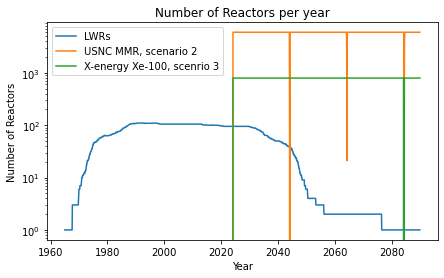

In [6]:
plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='LWRs')
plt.plot(mmr_reactors['Year'], mmr_reactors['mmr_total'], label='USNC MMR, scenario 2')
plt.plot(xe_reactors['Year'], xe_reactors['xe_total'], label='X-energy Xe-100, scenrio 3')
plt.title('Number of Reactors per year')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()
plt.savefig('figures/rx_deployment_all.png')

## Eletricity output

In [7]:
current_energy = tm.get_electricity(current_outfile)
mmr_energy = tm.get_electricity(mmr_outfile)
xe_energy = tm.get_electricity(xe_outfile)

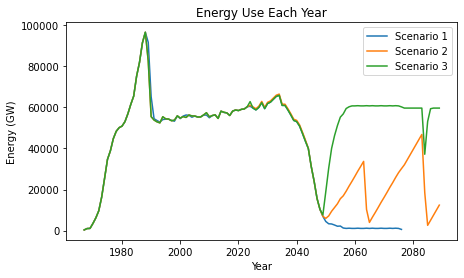

In [9]:
plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy (GW)'], label='Scenario 1')
plt.plot(mmr_energy['Year'], mmr_energy['Energy (GW)'], label='Scenario 2')
plt.plot(xe_energy['Year'], xe_energy['Energy (GW)'], label='Scenario 3')
plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GW)')
plt.legend()
plt.savefig('figures/energy_all.png')

In [10]:
#Provides level of electricity to set for transitions
current_energy['Energy (GW)'].loc[current_energy['Year'] == 2025]

58    59613.333333
Name: Energy (GW), dtype: float64

## Current scenario Transactions

In [11]:
current_leu = tm.calculate_throughput(current_outfile, 'enr_u')
current_feed = tm.calculate_throughput(current_outfile, 'uf6')
current_tails = tm.calculate_throughput(current_outfile, 'tails')
current_uox = tm.calculate_throughput(current_outfile, 'fresh_uox')

current_commodities = tm.merge_databases([current_leu, current_feed, current_tails, current_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## MMR Transition Transactions

In [12]:
mmr_leu = tm.calculate_throughput(mmr_outfile, 'enr_u')
mmr_haleu = tm.calculate_throughput(mmr_outfile, 'haleu')
mmr_feed = tm.calculate_throughput(mmr_outfile, 'uf6')
mmr_tails = tm.calculate_throughput(mmr_outfile, 'tails')
mmr_uox = tm.calculate_throughput(mmr_outfile, 'fresh_uox')
mmr_triso = tm.calculate_throughput(mmr_outfile, 'TRISO')

mmr_commodities = tm.merge_databases([mmr_leu, mmr_haleu, mmr_feed, mmr_tails,
                                      mmr_uox, mmr_triso])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Xe-100 Transition Transactions

In [13]:
xe_leu = tm.calculate_throughput(xe_outfile, 'enr_u')
xe_haleu = tm.calculate_throughput(xe_outfile, 'haleu')
xe_feed = tm.calculate_throughput(xe_outfile, 'uf6')
xe_tails = tm.calculate_throughput(xe_outfile, 'tails')
xe_uox = tm.calculate_throughput(xe_outfile, 'fresh_uox')
xe_triso = tm.calculate_throughput(xe_outfile, 'TRISO')

xe_commodities = tm.merge_databases([xe_leu, xe_haleu, xe_feed, xe_tails,
                                      xe_uox, xe_triso])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Plotting material transactions

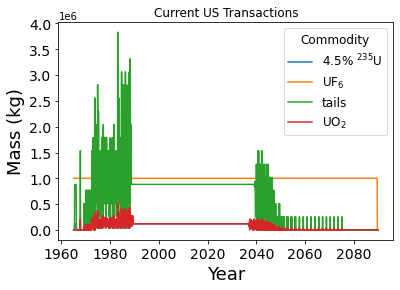

In [14]:
# Scenario 1
tm.plot_metric(current_commodities, ['Year', 'enr_u', 'uf6', 'tails', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'UF$_6$','tails', r'UO$_2$'])
plt.title('Current US Transactions')
plt.savefig('figures/commodity_demand_2020.png')

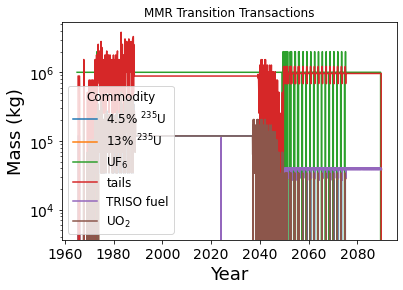

In [15]:
# Scenario 2
tm.plot_metric(mmr_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('MMR Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_mmr.png')

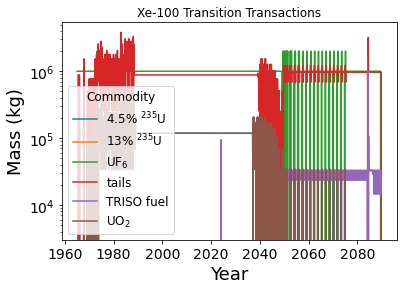

In [16]:
# Scenario 3
tm.plot_metric(xe_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('Xe-100 Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_xe.png')

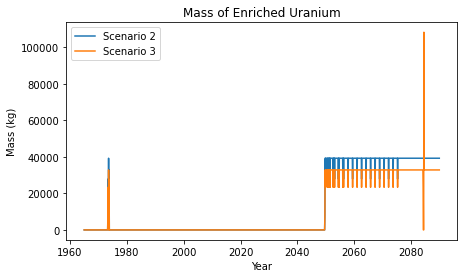

In [17]:
#Comparing haleu transactions
plt.figure(figsize=(7,4))
plt.plot(mmr_commodities['Year'], mmr_commodities['haleu'], label='Scenario 2')
plt.plot(xe_commodities['Year'], xe_commodities['haleu'], label='Scenario 3')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Mass of Enriched Uranium')
plt.savefig('figures/enrichedU_advancedrx.png')

## SWU Calculation
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [18]:
#Defining assays for LEU product, tails, and feed material
x_p = 0.045
x_f = 0.00711
x_t = 0.002

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


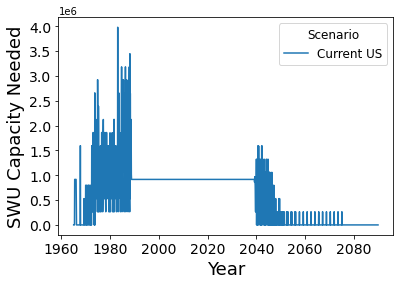

In [19]:
current_feed = tm.calculate_feed(current_commodities['enr_u'], current_commodities['tails'])
current_swu = tm.calculate_SWU(current_commodities['enr_u'], x_p, 
                               current_commodities['tails'], x_t, 
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={0:'SWU', 'index':'Time'})
current_swu = tm.add_year(current_swu)
tm.plot_metric(current_swu, ['Year', 'SWU'], ['Year', 'SWU Capacity Needed', 'Scenario', 'Current US'])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


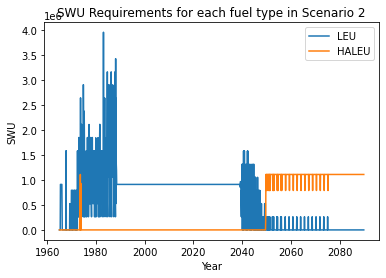

In [20]:
# Tails and feed masses are for both types of fuel and storage of feed at facility
# Need to calculate what would be required to produce just one level of 
# enriched uranium, and not account for facility stockpile. 
leu_tails = tm.calculate_tails(mmr_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(mmr_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(mmr_commodities['haleu'], 0.13, x_t, x_f)
haleu_feed = tm.calculate_feed(mmr_commodities['haleu'], haleu_tails)

mmr_leu_swu = tm.calculate_SWU(mmr_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
mmr_leu_swu = mmr_leu_swu.to_frame().reset_index()
mmr_leu_swu = mmr_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
mmr_leu_swu = tm.add_year(mmr_leu_swu)

mmr_haleu_swu = tm.calculate_SWU(mmr_commodities['haleu'], 0.13, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
mmr_haleu_swu = mmr_haleu_swu.to_frame().reset_index()
mmr_haleu_swu = mmr_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
mmr_haleu_swu = tm.add_year(mmr_haleu_swu)


plt.figure()
plt.plot(mmr_leu_swu['Year'], mmr_leu_swu['SWU'], label='LEU')
plt.plot(mmr_haleu_swu['Year'], mmr_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type in Scenario 2')
plt.legend()
plt.savefig('figures/swu_mmr.png')

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


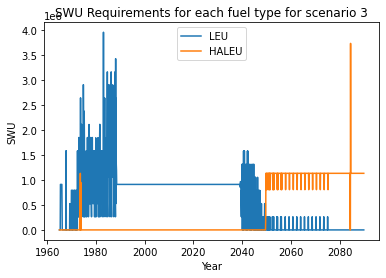

In [21]:
# Tails and feed masses are for both types of fuel and storage of feed at facility
# Need to calculate what would be required to produce just one level of 
# enriched uranium, and not account for facility stockpile. 
leu_tails = tm.calculate_tails(xe_commodities['enr_u'], x_p, x_t, x_f)
leu_feed = tm.calculate_feed(xe_commodities['enr_u'], leu_tails)
haleu_tails = tm.calculate_tails(xe_commodities['haleu'], 0.155, x_t, x_f)
haleu_feed = tm.calculate_feed(xe_commodities['haleu'], haleu_tails)

xe_leu_swu = tm.calculate_SWU(xe_commodities['enr_u'], x_p, 
                               leu_tails, x_t, 
                               leu_feed, x_f)
xe_leu_swu = xe_leu_swu.to_frame().reset_index()
xe_leu_swu = xe_leu_swu.rename(columns={'enr_u':'SWU', 'index':'Time'})
xe_leu_swu = tm.add_year(xe_leu_swu)

xe_haleu_swu = tm.calculate_SWU(xe_commodities['haleu'], 0.155, 
                               haleu_tails, x_t, 
                               haleu_feed, x_f)
xe_haleu_swu = xe_haleu_swu.to_frame().reset_index()
xe_haleu_swu = xe_haleu_swu.rename(columns={'haleu':'SWU', 'index':'Time'})
xe_haleu_swu = tm.add_year(xe_haleu_swu)


plt.figure()
plt.plot(xe_leu_swu['Year'], xe_leu_swu['SWU'], label='LEU')
plt.plot(xe_haleu_swu['Year'], xe_haleu_swu['SWU'], label='HALEU')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Requirements for each fuel type for scenario 3')
plt.legend()
plt.savefig('figures/swu_xe.png')

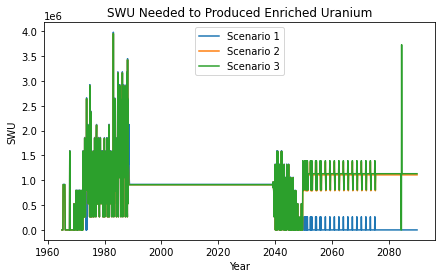

In [22]:
xe_total_swu = xe_haleu_swu['SWU'] + xe_leu_swu['SWU']
mmr_total_swu = mmr_haleu_swu['SWU'] + mmr_leu_swu['SWU']

plt.figure(figsize=(7,4))
plt.plot(current_swu['Year'], current_swu['SWU'], label='Scenario 1')
plt.plot(mmr_haleu_swu['Year'], mmr_total_swu, label='Scenario 2')
plt.plot(xe_haleu_swu['Year'], xe_total_swu, label='Scenario 3')
plt.xlabel('Year')
plt.ylabel('SWU')
plt.title('SWU Needed to Produced Enriched Uranium')
plt.legend()
plt.savefig('figures/swu_all.png')

In [23]:
print('LEU for LWRs: ', current_swu['SWU'].sum())
print('HALEU for MMRs: ', mmr_haleu_swu['SWU'].sum())
print('HALEU for Xe-100s: ', xe_haleu_swu['SWU'].sum())

LEU for LWRs:  873511271.6407924
HALEU for MMRs:  531066684.7478631
HALEU for Xe-100s:  542030642.4994845
